Random Forest

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_file_path = '../data/churn-bigml-80.csv'
test_file_path = '../data/churn-bigml-20.csv'

train_data = pd.read_csv(train_file_path)
test_data = pd.read_csv(test_file_path)

In [5]:
label_encoders = {}
categorical_columns = ['International plan', 'Voice mail plan', 'Churn']

for col in categorical_columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])  
    label_encoders[col] = le

scaler = StandardScaler()
numerical_columns = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge',
    'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls'
]

train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns] = scaler.transform(test_data[numerical_columns])

columns_to_drop = ['State', 'Area code']
train_data = train_data.drop(columns=columns_to_drop, axis=1)
test_data = test_data.drop(columns=columns_to_drop, axis=1)

In [6]:
from sklearn.ensemble import AdaBoostClassifier , BaggingClassifier , GradientBoostingClassifier , RandomForestClassifier
from imblearn.over_sampling import SMOTE
# Metrix 
from sklearn.metrics import accuracy_score , classification_report , precision_score , recall_score , confusion_matrix
# Roc
from sklearn.metrics import roc_curve, auc

model = RandomForestClassifier()

x_train = train_data.drop('Churn', axis=1)
y_train = train_data['Churn']
x_test = test_data.drop('Churn', axis=1)
y_test = test_data['Churn']


# smote = SMOTE()
# x,y = smote.fit_resample(x_train,y_train)


model.fit(x_train, y_train)

y_pred = model.predict(x_test)
y_probs = model.predict_proba(x_test)[:, 1]

train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Train Score is {train_accuracy}")
print(f"Test Score is {test_accuracy}")

print(classification_report(y_test, y_pred))

Train Score is 1.0
Test Score is 0.95952023988006
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.96      0.75      0.84        95

    accuracy                           0.96       667
   macro avg       0.96      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667



Text(33.22222222222222, 0.5, 'Actual')

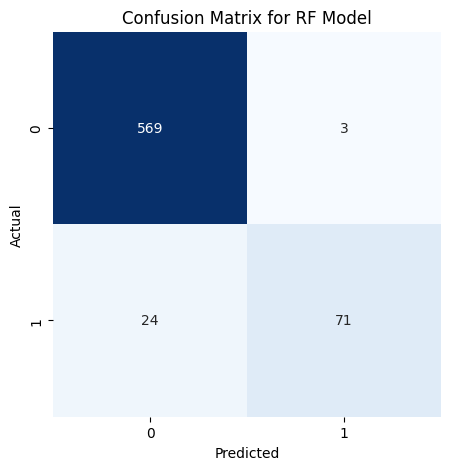

In [8]:
# confusion matrix
key = 'RF'

plt.figure(figsize=(5,5))

confusion_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion_mat, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
plt.title(f'Confusion Matrix for {key} Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
# plt.savefig(f'./data/heatmap-{key}.png', dpi=300, bbox_inches='tight')
# plt.close()


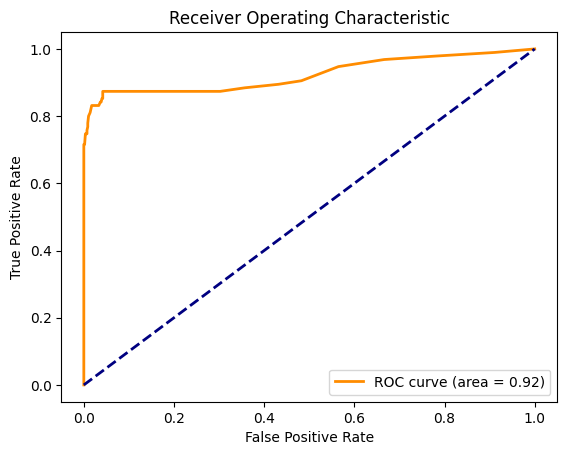

In [11]:

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
roc_image_path = f"./data/roc_curve-{key}.png"
# plt.savefig(roc_image_path)
# plt.close()

In [ ]:
import pickle

